# Mushrooms Classification - AdaBoost

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.ensemble import AdaBoostClassifier

In [4]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, \
                            recall_score, f1_score, ConfusionMatrixDisplay

In [5]:
from sklearn.model_selection import GridSearchCV

## Import Dataset

In [6]:
df = pd.read_csv('mushrooms.csv')

This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like ``leaflets three, let it be'' for Poisonous Oak and Ivy.


Attribute Information:

1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
4. bruises?: bruises=t,no=f
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
6. gill-attachment: attached=a,descending=d,free=f,notched=n
7. gill-spacing: close=c,crowded=w,distant=d
8. gill-size: broad=b,narrow=n
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
10. stalk-shape: enlarging=e,tapering=t
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
16. veil-type: partial=p,universal=u
17. veil-color: brown=n,orange=o,white=w,yellow=y
18. ring-number: none=n,one=o,two=t
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [8]:
df.describe().transpose()

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


In [9]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

## Exploratory Data Analysis

### Count of Target Variable

<Axes: xlabel='class', ylabel='count'>

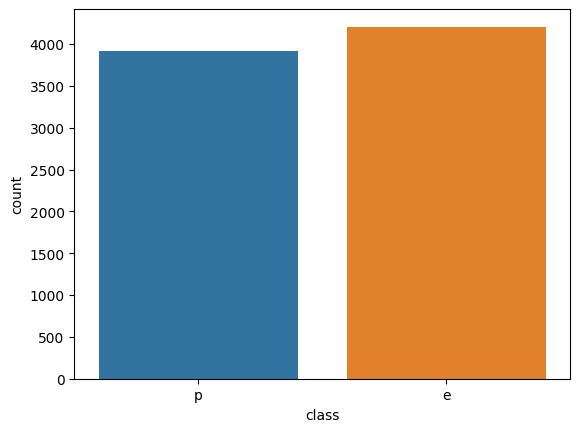

In [10]:
sns.countplot(data=df, x='class')

### Visualizing Number of Unique Features

In [11]:
unique_features = df.describe().transpose().reset_index().sort_values('unique')

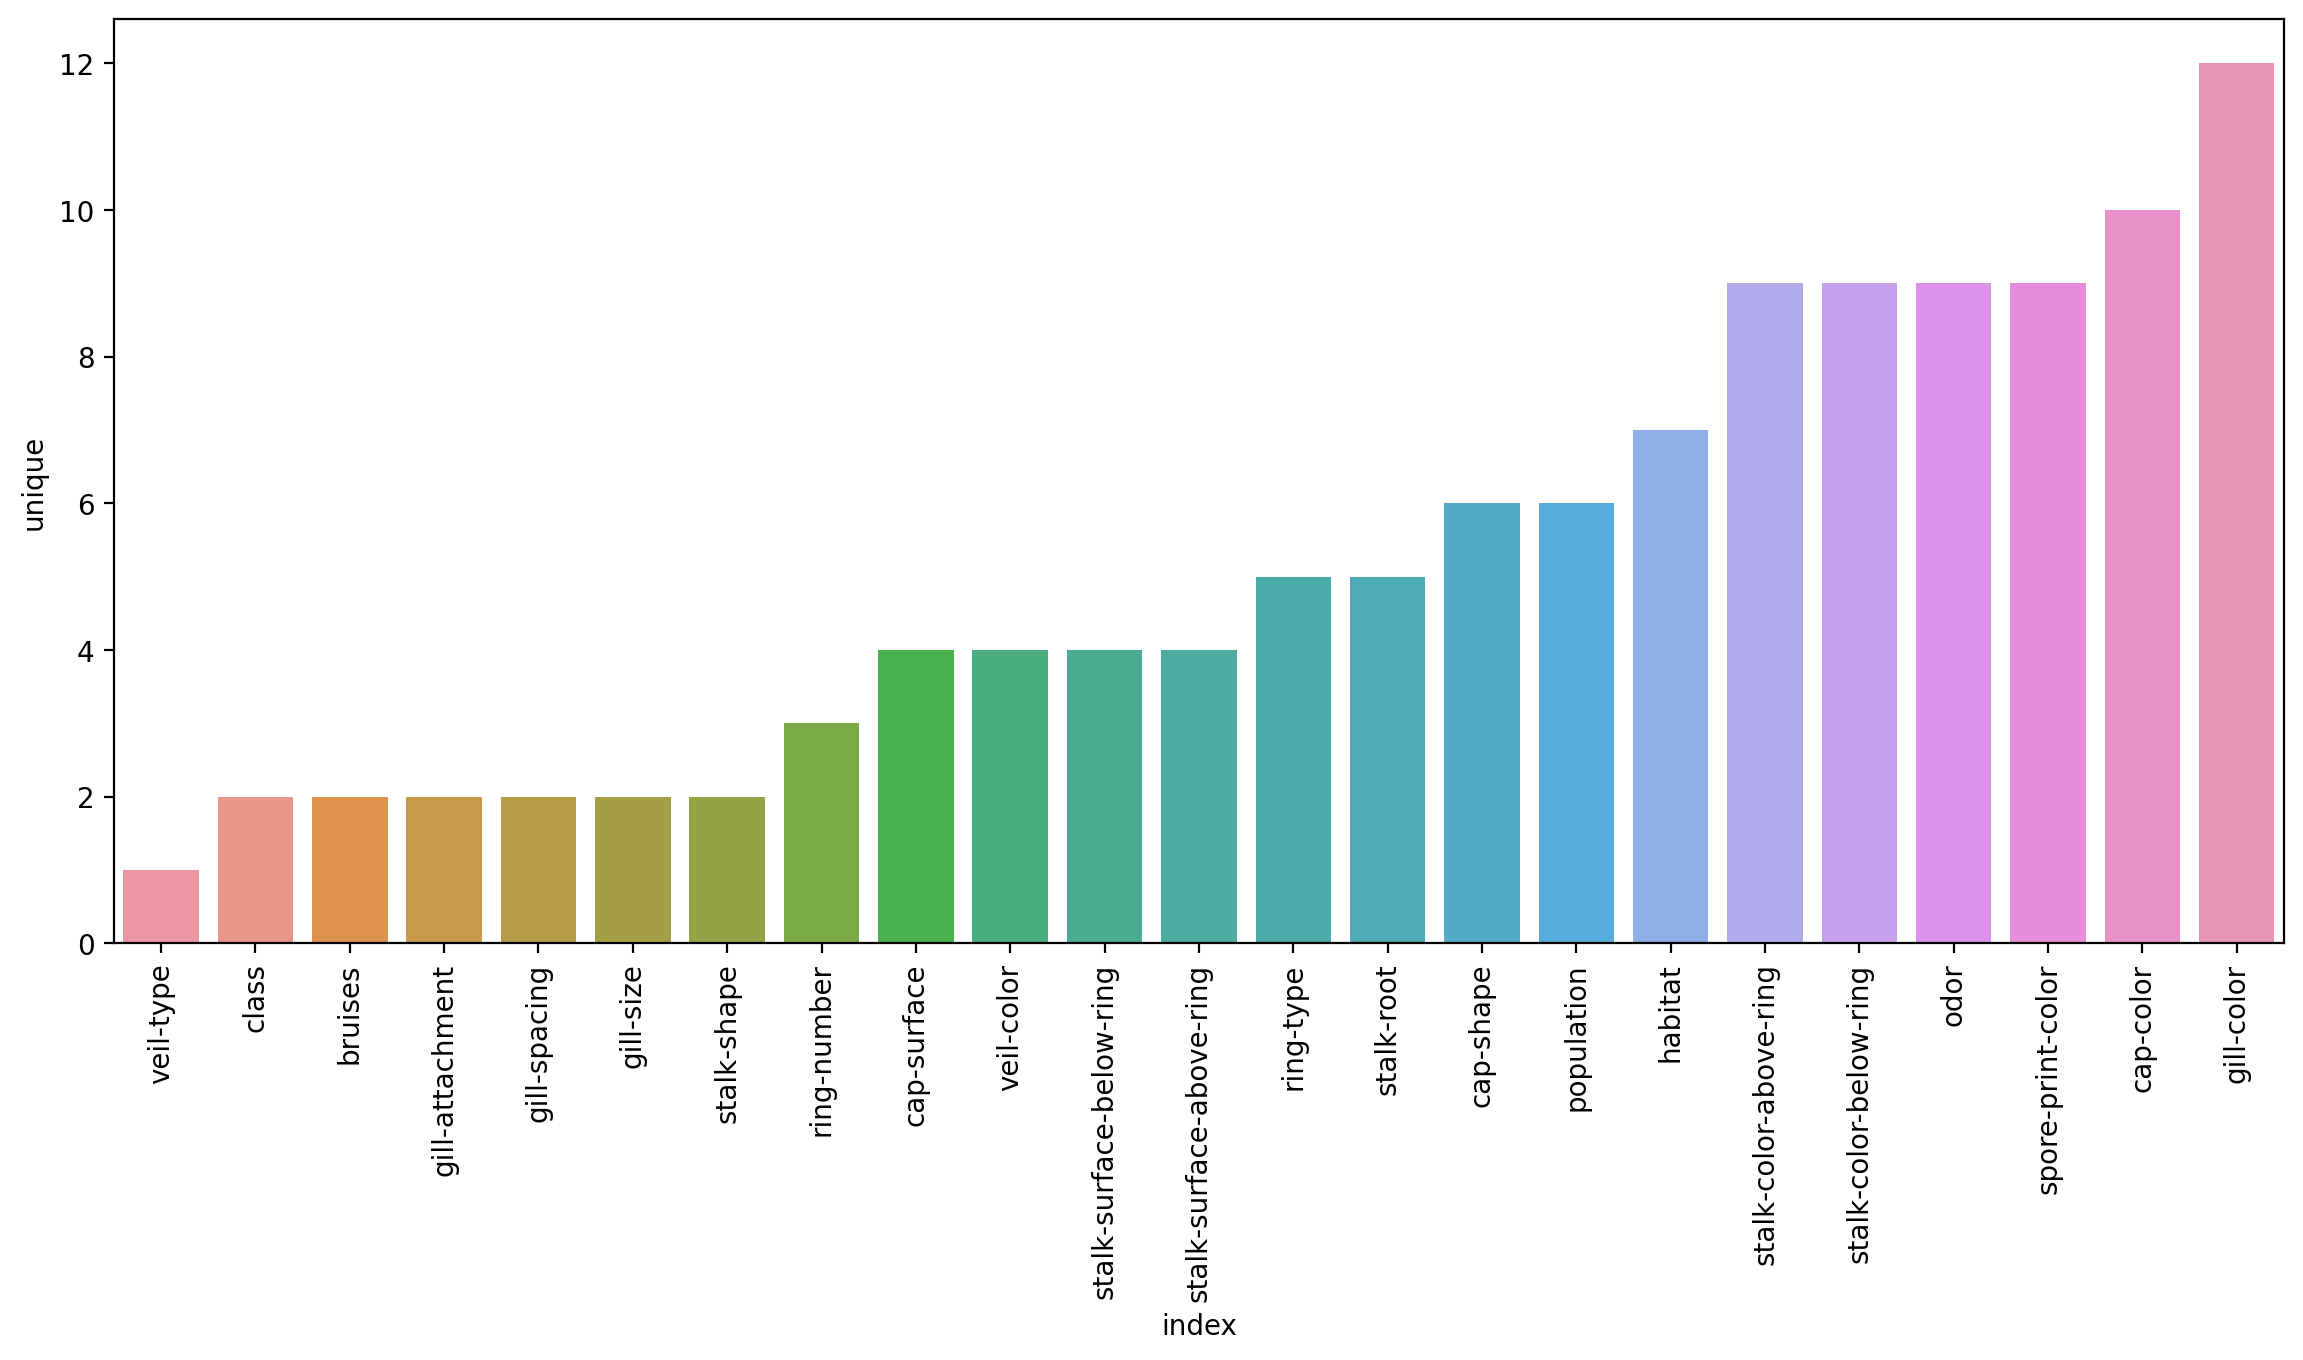

In [12]:
plt.figure(figsize=(14,6), dpi=200)
sns.barplot(data=unique_features, x='index', y='unique')
plt.xticks(rotation=90);

## Splitting X and Y Columns

In [13]:
X = df.drop('class', axis=1)
y = df['class']

X = pd.get_dummies(X, drop_first=True)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

## Creating Model

In [15]:
model = AdaBoostClassifier(n_estimators=1)

In [16]:
model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=1)

### Prediction and Evaluation

In [17]:
predictions = model.predict(X_test)

In [18]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           e       0.97      0.80      0.88       637
           p       0.82      0.97      0.89       582

    accuracy                           0.88      1219
   macro avg       0.89      0.89      0.88      1219
weighted avg       0.90      0.88      0.88      1219



In [19]:
model.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [20]:
model.feature_importances_.argmax()

22

In [21]:
X.columns[22]

'odor_n'

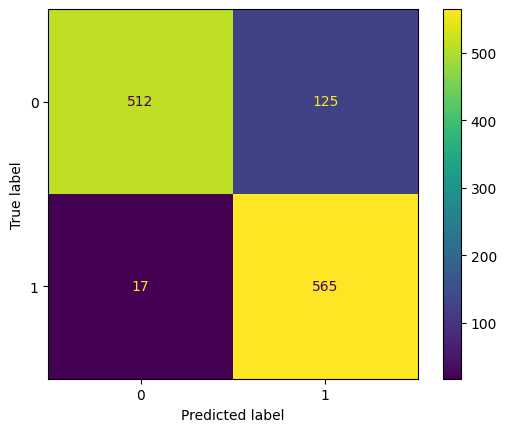

In [22]:
matrix = confusion_matrix(y_test, predictions)
confusion_matrix_plot = ConfusionMatrixDisplay(confusion_matrix=matrix)
confusion_matrix_plot.plot()

In [23]:
print(f"Accuracy Score: {accuracy_score(y_test, predictions)}")
print(f"Precision Score: {precision_score(y_test, predictions, pos_label='p')}")
print(f"Recall Score: {recall_score(y_test, predictions, pos_label='p')}")
print(f"F1 Score: {f1_score(y_test, predictions, pos_label='p')}")

Accuracy Score: 0.8835110746513536
Precision Score: 0.8188405797101449
Recall Score: 0.9707903780068728
F1 Score: 0.8883647798742138


## Creating Model for All X Features

### Using Elbow Method

In [24]:
len(X.columns)

95

In [25]:
error_rates = []

for n in range(1, 96):
    model = AdaBoostClassifier(n_estimators=n)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    error = 1 - accuracy_score(y_test, predictions)
    
    error_rates.append(error)

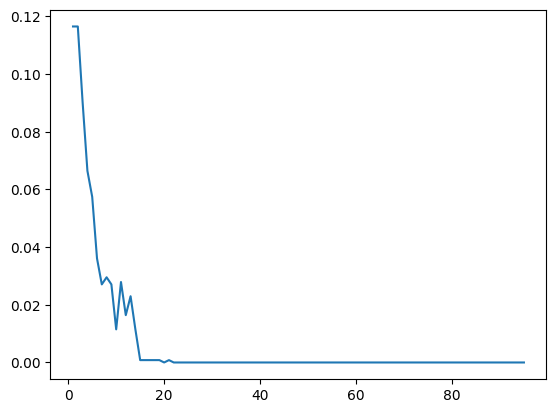

In [26]:
plt.plot(range(1, 96), error_rates)

## Creating New Model Selected by Elbow Method

In [27]:
new_model = AdaBoostClassifier(n_estimators=22)

In [28]:
new_model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=22)

### Prediction and Evaluation

In [29]:
new_predictions = new_model.predict(X_test)

In [30]:
new_model.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.04545455, 0.        , 0.        , 0.04545455, 0.04545455,
       0.        , 0.        , 0.13636364, 0.04545455, 0.        ,
       0.        , 0.        , 0.04545455, 0.13636364, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.04545455, 0.        , 0.        , 0.        , 0.        ,
       0.04545455, 0.        , 0.        , 0.        , 0.        ,
       0.04545455, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.04545455, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [31]:
features = pd.DataFrame(index=X.columns, data=new_model.feature_importances_, columns=['Importance'])
important_features = features[features['Importance'] > 0]
important_features

,Importance
cap-color_w,0.045455
odor_c,0.045455
odor_f,0.045455
odor_n,0.136364
odor_p,0.045455
gill-spacing_w,0.045455
gill-size_n,0.136364
stalk-shape_t,0.045455
stalk-surface-above-ring_k,0.045455
stalk-surface-below-ring_y,0.045455


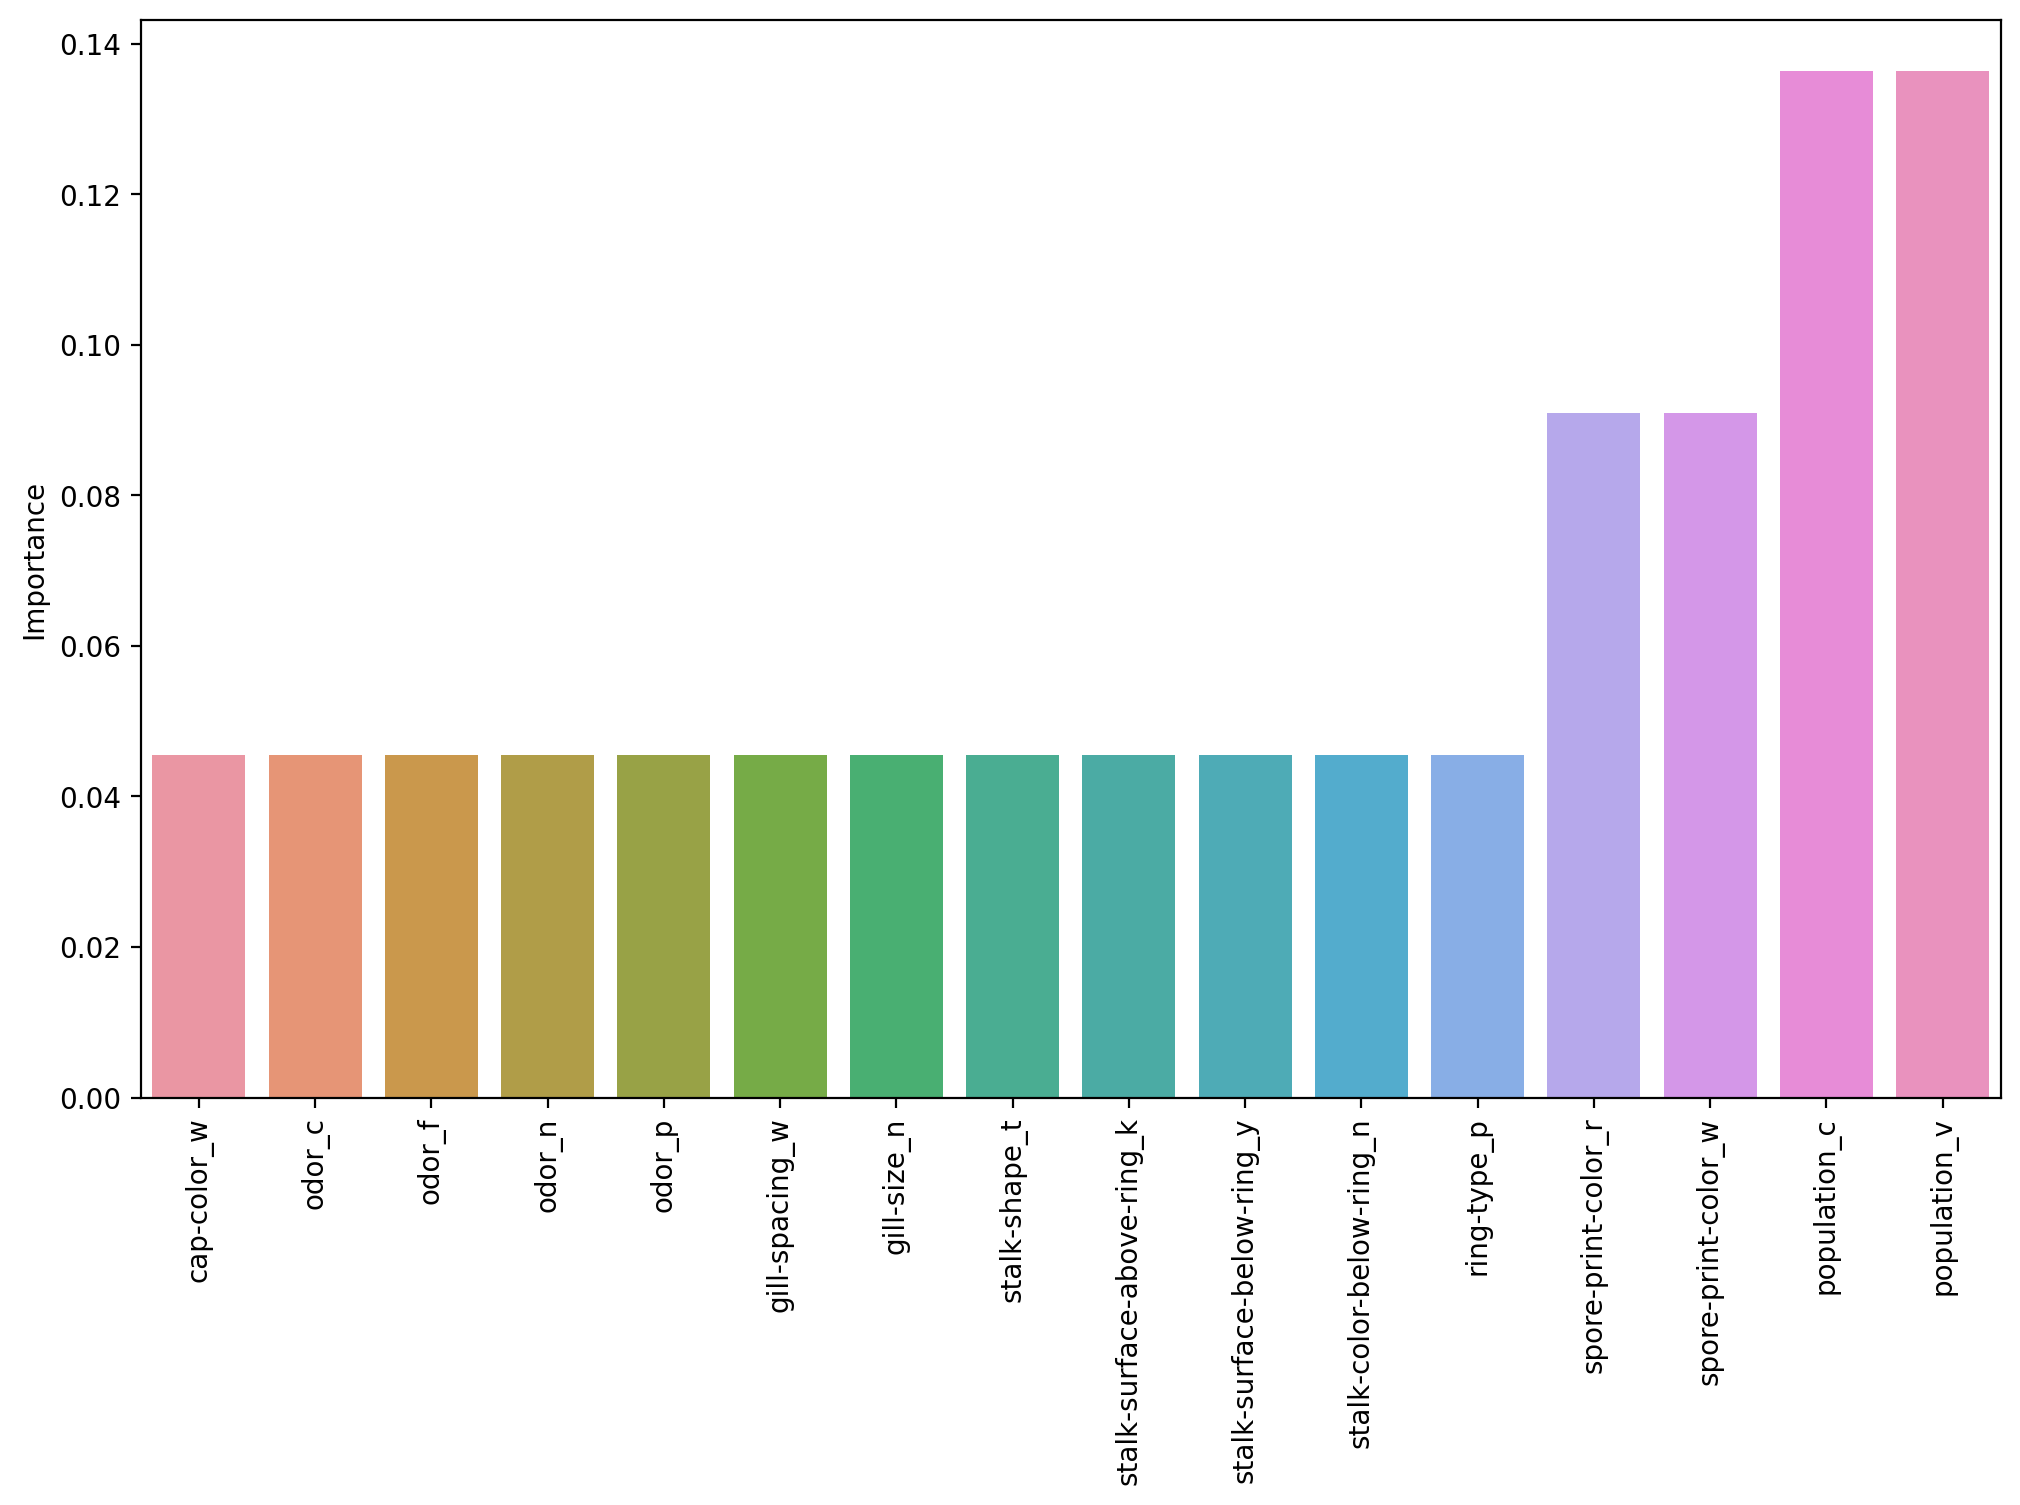

In [32]:
plt.figure(figsize=(12,7), dpi=200)
sns.barplot(data=important_features.sort_values('Importance'), x=important_features.index, y='Importance')
plt.xticks(rotation=90);

In [33]:
print(classification_report(y_test, new_predictions))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       637
           p       1.00      1.00      1.00       582

    accuracy                           1.00      1219
   macro avg       1.00      1.00      1.00      1219
weighted avg       1.00      1.00      1.00      1219



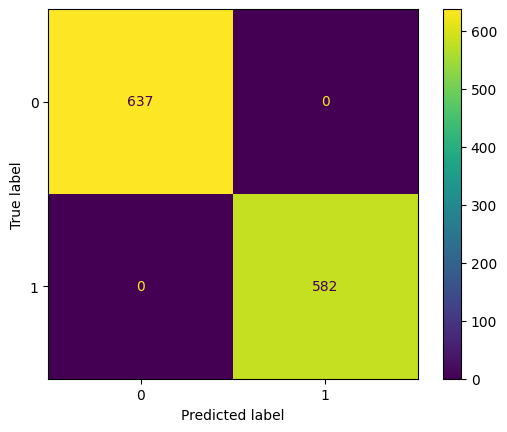

In [34]:
matrix = confusion_matrix(y_test, new_predictions)
confusion_matrix_plot = ConfusionMatrixDisplay(confusion_matrix=matrix)
confusion_matrix_plot.plot()